In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import pickle
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_pickle("autonom_lemmatized.p")

### Identify Topics

In [5]:
def display_topics(model, feature_names, n_top_words, plot = False, plot_dim=(5,2)):
    
    topics_tokens = []
    
    for topic_idx, topic in enumerate(model.components_):

        if not plot:
            print "Topic %d:" % (topic_idx)
            print " ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
            
        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        
        topic_words = [(token, counts)
                       for token, counts in topic[:-n_top_words - 1:-1]]
        
        topics_tokens.append(topic_words)
        
        


    if plot:
        
        plot_matrix = np.arange(10).reshape(5,2)
    
        fig, ax = plt.subplots(figsize=(10, 10), nrows=5, ncols=2)
        
        topics = [
            {key: value for key, value in topic} 
                  for topic in topics_tokens
        ]
        
        row = 0
        
        for topic_id, topic in enumerate(topics):
            
            column = (0 if topic_id % 2 == 0 else 1)
                
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
                
            row += 1 if column == 1 else 0
        
        plt.tight_layout()
        
            
def modeler(corp, n_topics, n_top_words, clf, vect, plot = False):
    df = .80
    str_vect = str(vect).split("(")[0]
    str_clf = str(clf).split("(")[0]

    print("Extracting {} features for {}...".format(str_vect, str_clf))
    vect_trans = vect.fit_transform(corp)


    # Fit the model
    print("Fitting the {} model with {} features, "
          "n_topics= {}, n_topic_words= {}..."
          .format(str_clf, str_vect, n_topics, n_top_words))

    clf = clf.fit(vect_trans)
    if str_clf == "TruncatedSVD":
        print("\nExplained variance ratio", clf.explained_variance_ratio_)
        
    print("\nTopics in {} model:".format(str_clf))
    feature_names = vect.get_feature_names()
    
    if not plot:
        return display_topics(clf, feature_names, n_top_words)

    if plot:
        return display_topics(clf, feature_names, n_top_words, True)

In [6]:
modeler(df.text, 10, 10, NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5), \
        TfidfVectorizer(max_df=.98, min_df=2,stop_words='english'))

Extracting TfidfVectorizer features for NMF...
Fitting the NMF model with TfidfVectorizer features, n_topics= 10, n_topic_words= 10...

Topics in NMF model:
Topic 0:
datum object little environment determine base information control receive detect
Topic 1:
steer wheel angle torque position control speed controller actuator brake
Topic 2:
image capture camera process portion receive object digital display color
Topic 3:
park space area available movement spot assist maneuver motor control
Topic 4:
lane travel information segment boundary path determine change computer road
Topic 5:
drive driver state unit control information behavior motor section travel
Topic 6:
trailer backup hitch assist angle controller rate input command yaw
Topic 7:
uav flight aerial unman land station battery medical uavs energy
Topic 8:
mode operate control manual little operational controller driver input transition
Topic 9:
location passenger destination request route pick compute pickup transportation network

### Visualize Findings

Extracting TfidfVectorizer features for NMF...
Fitting the NMF model with TfidfVectorizer features, n_topics= 10, n_topic_words= 10...

Topics in NMF model:


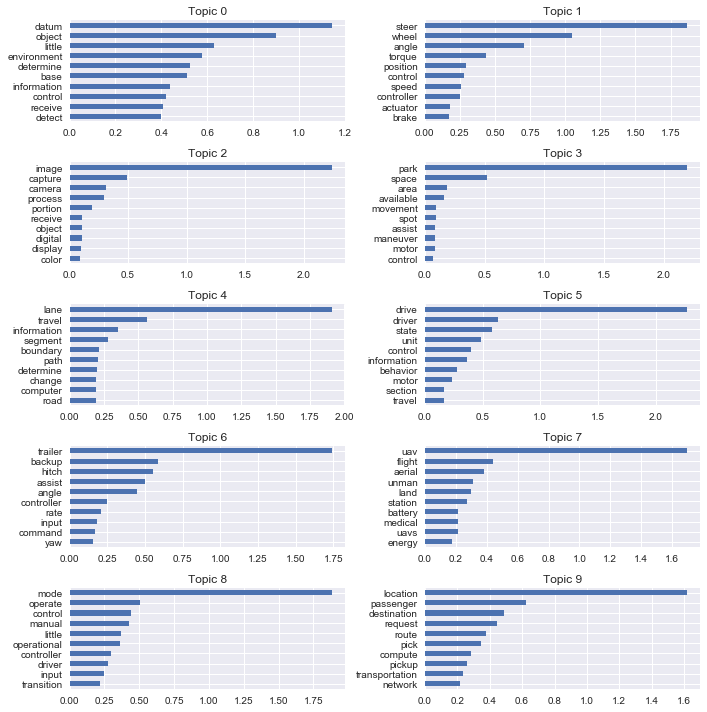

In [7]:
modeler(df.text, 10, 10, NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5), \
        TfidfVectorizer(max_df=.98, min_df=2,stop_words='english'), True)

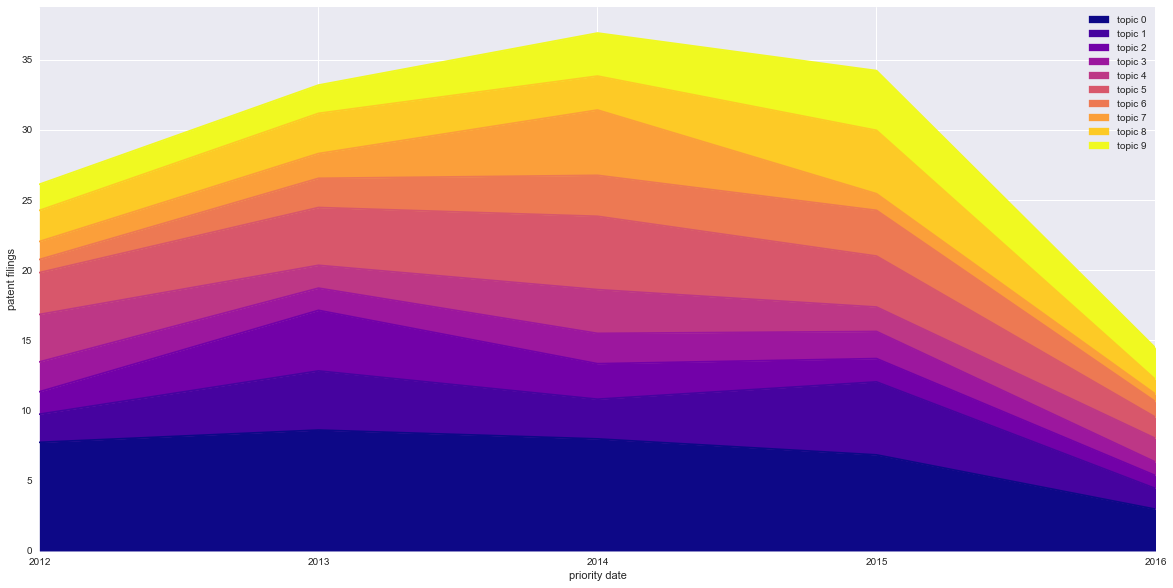

In [8]:
tfidf = TfidfVectorizer(max_df=.98, min_df=2, stop_words='english')
X_tf = tfidf.fit_transform(df.text)

nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5).fit(X_tf)
comp = nmf.transform(X_tf)
document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
document_topics.index = df['priority date']
df_new = document_topics.groupby(pd.TimeGrouper(freq='A')).sum()
df_Y = df_new.loc['2012-1-1':'2017-1-1']
df_Y.plot(kind = 'area', stacked = True, figsize = (20,10), colormap='plasma')
plt.ylabel('patent filings')
plt.show()
    

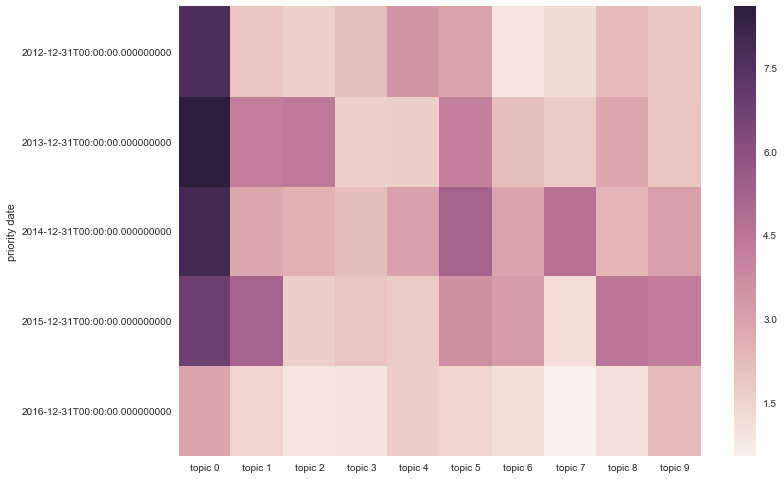

In [9]:
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_Y, xticklabels=True)
plt.show()

## PCA to Visualize

In [10]:
from sklearn.decomposition import PCA
import time
from sklearn.preprocessing import normalize

In [11]:
tfidf_matrix = tfidf.fit_transform(df.text)

In [12]:
tfidf.get_feature_names()

[u'3d',
 u'ability',
 u'able',
 u'abnormal',
 u'aboard',
 u'absence',
 u'absolute',
 u'absorb',
 u'absorber',
 u'accelerate',
 u'acceleration',
 u'accelerator',
 u'accelerometer',
 u'accept',
 u'acceptable',
 u'acceptance',
 u'access',
 u'accessible',
 u'accident',
 u'accomplish',
 u'accord',
 u'accordance',
 u'accordingly',
 u'account',
 u'accuracy',
 u'accurate',
 u'accurately',
 u'achieve',
 u'acoustic',
 u'acquire',
 u'acquisition',
 u'act',
 u'action',
 u'activate',
 u'activation',
 u'active',
 u'actively',
 u'activity',
 u'actual',
 u'actually',
 u'actuatable',
 u'actuate',
 u'actuation',
 u'actuator',
 u'ad',
 u'adapt',
 u'adaptation',
 u'adaptive',
 u'add',
 u'addition',
 u'additional',
 u'additionally',
 u'address',
 u'adjacent',
 u'adjust',
 u'adjustable',
 u'adjustment',
 u'administration',
 u'advance',
 u'advantage',
 u'adverse',
 u'advertisement',
 u'aerial',
 u'aerodynamic',
 u'affect',
 u'agent',
 u'aggregate',
 u'aggressive',
 u'agricultural',
 u'ahead',
 u'aid',
 u'aim

In [13]:
feature_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
feature_matrix.head()

,3d,ability,able,abnormal,aboard,absence,absolute,absorb,absorber,accelerate,...,wiper,wire,wireless,wirelessly,work,world,yaw,yield,zero,zone
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.308817,0.0,0.085953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
feature_matrix.shape

(975, 1766)

In [56]:
pca = PCA(n_components=330)
vectors = pca.fit_transform(feature_matrix)

In [57]:
np.sum(pca.explained_variance_ratio_)

0.80214356587549152

In [58]:
print(pca.explained_variance_ratio_)

[ 0.01683749  0.01380069  0.01292371  0.01133635  0.0108178   0.01030745
  0.00994732  0.00899378  0.0086631   0.0082208   0.00775037  0.00740437
  0.00729883  0.00708934  0.00669761  0.00660858  0.00640773  0.00633864
  0.00593506  0.00585227  0.00576804  0.00561041  0.00537624  0.00518792
  0.00517051  0.00508177  0.00502926  0.00488706  0.00479808  0.00474724
  0.00464942  0.0045804   0.00448771  0.00444719  0.00436356  0.00435053
  0.00430233  0.00425657  0.00414804  0.00411756  0.00407421  0.00401346
  0.00399804  0.00393521  0.00389391  0.00383598  0.00382311  0.00378113
  0.00376715  0.00371293  0.00370589  0.00362505  0.00357537  0.00356338
  0.0035217   0.00350722  0.00345081  0.00343694  0.00342779  0.00335382
  0.00333353  0.00331293  0.00329603  0.00328151  0.00326242  0.0032015
  0.00315437  0.00312219  0.00310446  0.00308554  0.00306047  0.00303955
  0.0030369   0.00300053  0.00299282  0.00296567  0.00292716  0.00291016
  0.00290122  0.00288126  0.00287386  0.0028558   0.

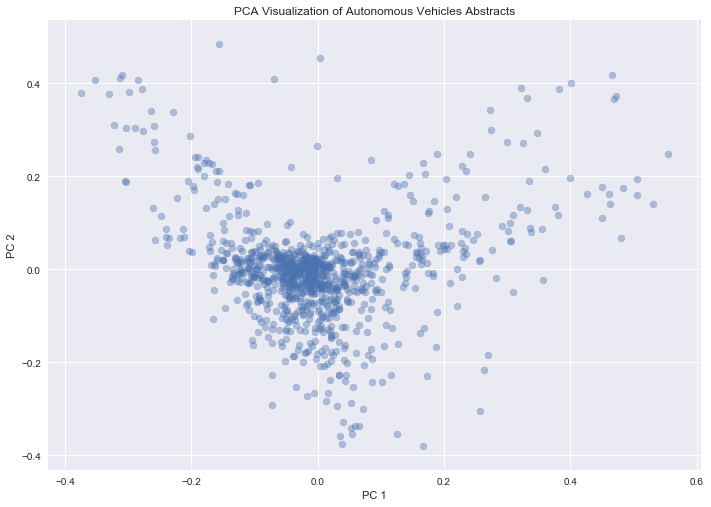

In [59]:
fig, ax = plt.subplots()
plt.scatter(vectors[:, 0], vectors[:, 1], s=50, cmap='viridis', alpha=0.4)
plt.title('PCA Visualization of Autonomous Vehicles Abstracts')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [60]:
from sklearn.cluster import KMeans

In [61]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)
centroids = pd.DataFrame(kmeans.cluster_centers_)
y_kmeans = kmeans.predict(vectors)

In [62]:
df['cluster_affiliation'] = y_kmeans

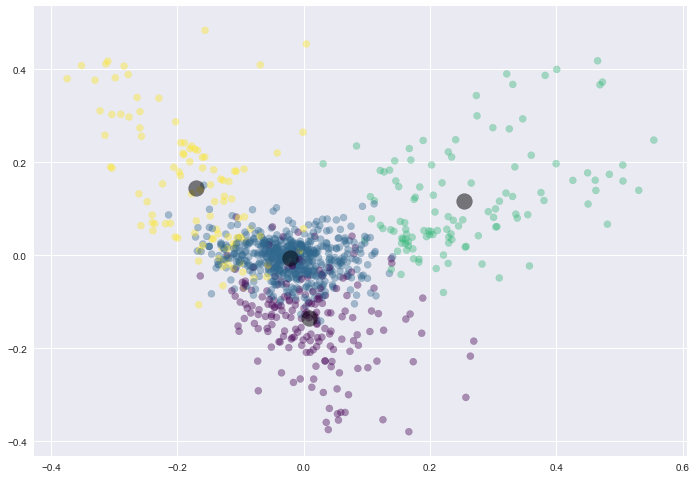

In [63]:
fig, ax = plt.subplots()
plt.scatter(vectors[:, 0], vectors[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.4)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=0.5);

In [68]:
df.sample(5)

,id,title,assignee,inventor/author,priority date,filing/creation date,publication date,grant date,result link,text,cluster_affiliation
priority date,,,,,,,,,,,
2014-03-14,US20150259007A1,System and Method for Semi-Autonomous Driving ...,"Mitsubishi Electric Research Laboratories, Inc.","Stefano Di Cairano, Spyridon Zafeiropoulos",2014-03-14,2014-03-14,2015-09-17,NaT,https://patents.google.com/patent/US2015025900...,semi drive steer wire steer wheel mechanically...,2
2012-09-26,US9383753B1,Wide-view LIDAR with areas of special attention,Google Inc.,"Bradley Templeton, Pierre-Yves Droz, Jiajun Zhu",2012-09-26,2012-09-26,2016-07-05,2016-07-05,https://patents.google.com/patent/US9383753B1/en,light detection range dynamically adjustable a...,1
2016-04-19,US20170299769A1,Arrangement structure for vicinity information...,Toyota Jidosha Kabushiki Kaisha,"Masanobu Ohmi, Seiji Yamamoto, Yoshiaki Matsum...",2016-04-19,2017-04-07,2017-10-19,NaT,https://patents.google.com/patent/US2017029976...,arrangement structure vicinity information det...,1
2012-11-30,US20140156182A1,Determining and displaying auto drive lanes in...,"Philip Nemec, Brian Cullinane, Manuel Christia...","Philip Nemec, Brian Cullinane, Manuel Christia...",2012-11-30,2013-03-11,2014-06-05,NaT,https://patents.google.com/patent/US2014015618...,aspect disclosure relate generally identify di...,0
2013-03-15,US9310808B2,Apparatus and method for autonomous control an...,Mts Systems Corporation,"Craig Robert Shankwitz, Arthur Richard Baker, III",2013-03-15,2013-03-15,2016-04-12,2016-04-12,https://patents.google.com/patent/US9310808B2/en,control use motorcycle terrain atv autonomous...,1
